In [1]:
%pylab inline

import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches


from collections import defaultdict, Counter, OrderedDict

import cytograph as cg
import loompy
import palettable

sys.path.append(os.path.realpath(os.path.join(os.getcwd(), '..')))
from scbeta_scrnaseq import utils
from scbeta_scrnaseq import vis
import scbeta_scrnaseq.cytograph_inmem_utils as cgm
import scbeta_scrnaseq.cytograph_analyses as cga

from scbeta_scrnaseq.figure_vis import core_colors
import scbeta_scrnaseq.figure_vis as fv
fv.setup_matplotlib_params()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
pb_tpm = {}
for pbf in glob.glob('../*/data/complete_processing/*.pseudobulk_tpm.df.npz'):
    key = os.path.basename(pbf)[:-(len('.pseudobulk_tpm.df.npz'))]
    pb_tpm[key] = utils.load_df(pbf)
    
pb_expr = {}
for pbf in glob.glob('../*/data/complete_processing/*.expr_frac.df.npz'):
    key = os.path.basename(pbf)[:-(len('.expr_frac.df.npz'))]
    pb_expr[key] = utils.load_df(pbf)

In [3]:
# ordered_samples =  ['stage6.labels', "x1_S6c", "x2_S6c",
#                     'stage5.labels', "x1_S5c", "x2_S5c",
#                     "x1_S4c", "x2_S4c",
#                     "x1_S3c",  "x2_S3c"]

# label_order = ['scbeta', 'ph', 'ec',
#                'neurog3', 'neurog3_late', 'neurog3_mid', 'neurog3_early', 
#                'foxj1', 'fev_high_isl_neg', 'fev_high_isl_low', 'phox2a',
#                'sst', 'sst_hhex', 'exo', 'prog_sox2', 'prog_nkx61', 'nkx61', 'pdx1']

# label_o = defaultdict( lambda: 100, 
#                       {k:i for i,k in enumerate(label_order)})


# label_list = []
# for ki,k in enumerate(ordered_samples):
#     df = pb_tpm[k]
#     for c in df.index:
# #         print(f"('{k}', '{c}'),")
#         label_list.append({'sample':k, 'label':c, 'sample_o': ki, 'label_o': label_o[c]})
# label_list = pd.DataFrame(label_list)

In [4]:
importlib.reload(fv)

<module 'scbeta_scrnaseq.figure_vis' from '/Users/averes/Projects/Melton/Papers/Mapping_SCbeta/2019_02_04_final_version/code/scbeta_scrnaseq/figure_vis.py'>

In [5]:
# for d,el in label_list.sort_values(['label_o','sample_o']).iterrows():
#     print(f"""('{el['sample']}', '{el['label']}'),""")
# #     break

In [6]:
cluster_order_details = [
    (('human_islets.labels', 'beta'), "islets"),
    (('human_islets.labels', 'alpha'), "islets"),
    (('human_islets.labels', 'delta'), "islets"),
    (('human_islets.labels', 'gamma'), "islets"),
    (('human_islets.labels', 'acinar'), "islets"),
    (('human_islets.labels', 'ductal'), "islets"),
    (('stage6.labels', 'scbeta'), "scbeta"),
    (('x1_S6c', 'scbeta'), "scbeta"),
    (('x2_S6c', 'scbeta'), "scbeta"),
    (('stage5.labels', 'scbeta'), "scbeta"),
    (('x1_S5c', 'scbeta'), "scbeta"),
    (('x2_S5c', 'scbeta'), "scbeta"),
    (('stage6.labels', 'ec'), "ec"),
    (('x1_S6c', 'ec'), "ec"),
    (('x2_S6c', 'ec'), "ec"),
    (('stage5.labels', 'ec'), "ec"),
    (('x1_S5c', 'ec'), "ec"),
    (('x2_S5c', 'ec'), "ec"),
    (('stage6.labels', 'ph'), "ph"),
    (('x1_S6c', 'ph'), "ph"),
    (('x2_S6c', 'ph'), "ph"),
    (('stage5.labels', 'ph'), "ph"),
    (('x1_S5c', 'ph'), "ph"),
    (('x2_S5c', 'ph'), "ph"),
    (('x1_S4c', 'ph'), "ph"),
    (('x2_S4c', 'ph'), "ph"),
    (('stage6.labels', 'sst'), "sst_hhex"),
    (('x1_S6c', 'sst_hhex'), "sst_hhex"),
    (('x2_S6c', 'sst_hhex'), "sst_hhex"),
    (('stage5.labels', 'sst_hhex'), "sst_hhex"),
    (('x1_S5c', 'sst_hhex'), "sst_hhex"),
    (('x2_S5c', 'sst_hhex'), "sst_hhex"),
    (('x1_S4c', 'sst_hhex'), "sst_hhex"),
    (('x2_S4c', 'sst_hhex'), "sst_hhex"),
    (('stage6.labels', 'neurog3'), "neurog3"),
    (('stage5.labels', 'neurog3_late'), "neurog3"),
    (('stage5.labels', 'neurog3_mid'), "neurog3"),
    (('stage5.labels', 'neurog3_early'), "neurog3"),
    (('x1_S4c', 'neurog3'), "neurog3"),
    (('x2_S4c', 'neurog3'), "neurog3"),
    (('stage5.labels', 'fev_high_isl_low'), "fev_high_isl_low"),
    (('x1_S4c', 'fev_high_isl_neg'), "fev_high_isl_low"),
    (('x2_S4c', 'fev_high_isl_neg'), "fev_high_isl_low"),
    (('x1_S6c', 'foxj1'), "foxj1"),
    (('x1_S5c', 'foxj1'), "foxj1"),
    (('stage6.labels', 'exo'), "exo"),
    (('x1_S6c', 'exo'), "exo"),
    (('x2_S6c', 'exo'), "exo"),
    (('stage5.det_labels', 'exo__lgals3'), "exo"),
    (('stage5.labels', 'exo'), "exo"),
    (('x1_S5c', 'exo'), "exo"),
    (('x2_S5c', 'exo'), "exo"),
    (('stage5.labels', 'prog_sox2'), "exo"),
    (('stage5.labels', 'prog_nkx61'), "nkx61"),
    (('x1_S4c', 'nkx61'), "nkx61"),
    (('x2_S4c', 'nkx61'), "nkx61"),
    (('x1_S3c', 'pdx1'), "pdx1"),
    (('x2_S3c', 'pdx1'), "pdx1"),
    (('stage6.labels', 'repl'), "repl"),
    (('x1_S6c', 'repl'), "repl"),
    (('x2_S6c', 'repl'), "repl"),
    (('x1_S5c', 'repl'), "repl"),
    (('x1_S4c', 'repl'), "repl"),
    (('x1_S3c', 'repl'), "repl"),
    (('x2_S3c', 'repl'), "repl"),
    (('stage6.det_labels', 'other__gap43'), "other"),
    (('stage6.det_labels', 'other__onecut3'), "other"),
    (('stage6.det_labels', 'other__phox2a'), "other"),
    (('stage5.labels', 'phox2a'), "other"),
][::-1]

cluster_order, cluster_metagrp = zip(*cluster_order_details)

cluster_tpm = utils.combine_rows(pb_tpm, cluster_order)
cluster_expr = utils.combine_rows(pb_expr, cluster_order)

In [7]:
dataset_labels = {'stage6': 'S6 tc.',
 'stage5': 'S5 tc.',
 "x1_S6c": 'S3-6 tc.',
 "x2_S6c": 'S3-6 tc.',
 "x1_S5c": 'S3-6 tc.',
 "x2_S5c": 'S3-6 tc.',
 "x1_S4c": 'S3-6 tc.',
 "x2_S4c": 'S3-6 tc.',
 "x1_S3c": 'S3-6 tc.',
 "x2_S3c": 'S3-6 tc.',
 "human_islets": 'Islets',}

dataset_protocol = {'stage6': 'v8',
 'stage5': 'v8',
 "x1_S6c": 'x1',
 "x2_S6c": 'x2',
 "x1_S5c": 'x1',
 "x2_S5c": 'x2',
 "x1_S4c": 'x1',
 "x2_S4c": 'x2',
 "x1_S3c": 'x1',
 "x2_S3c": 'x2',
 "human_islets": '',}

dataset_stage = {'stage6': '6',
 'stage5': '5',
 "x1_S6c": '6',
 "x2_S6c": '6',
 "x1_S5c": '5',
 "x2_S5c": '5',
 "x1_S4c": '4',
 "x2_S4c": '4',
 "x1_S3c": '3',
 "x2_S3c": '3',
 "human_islets": '',}

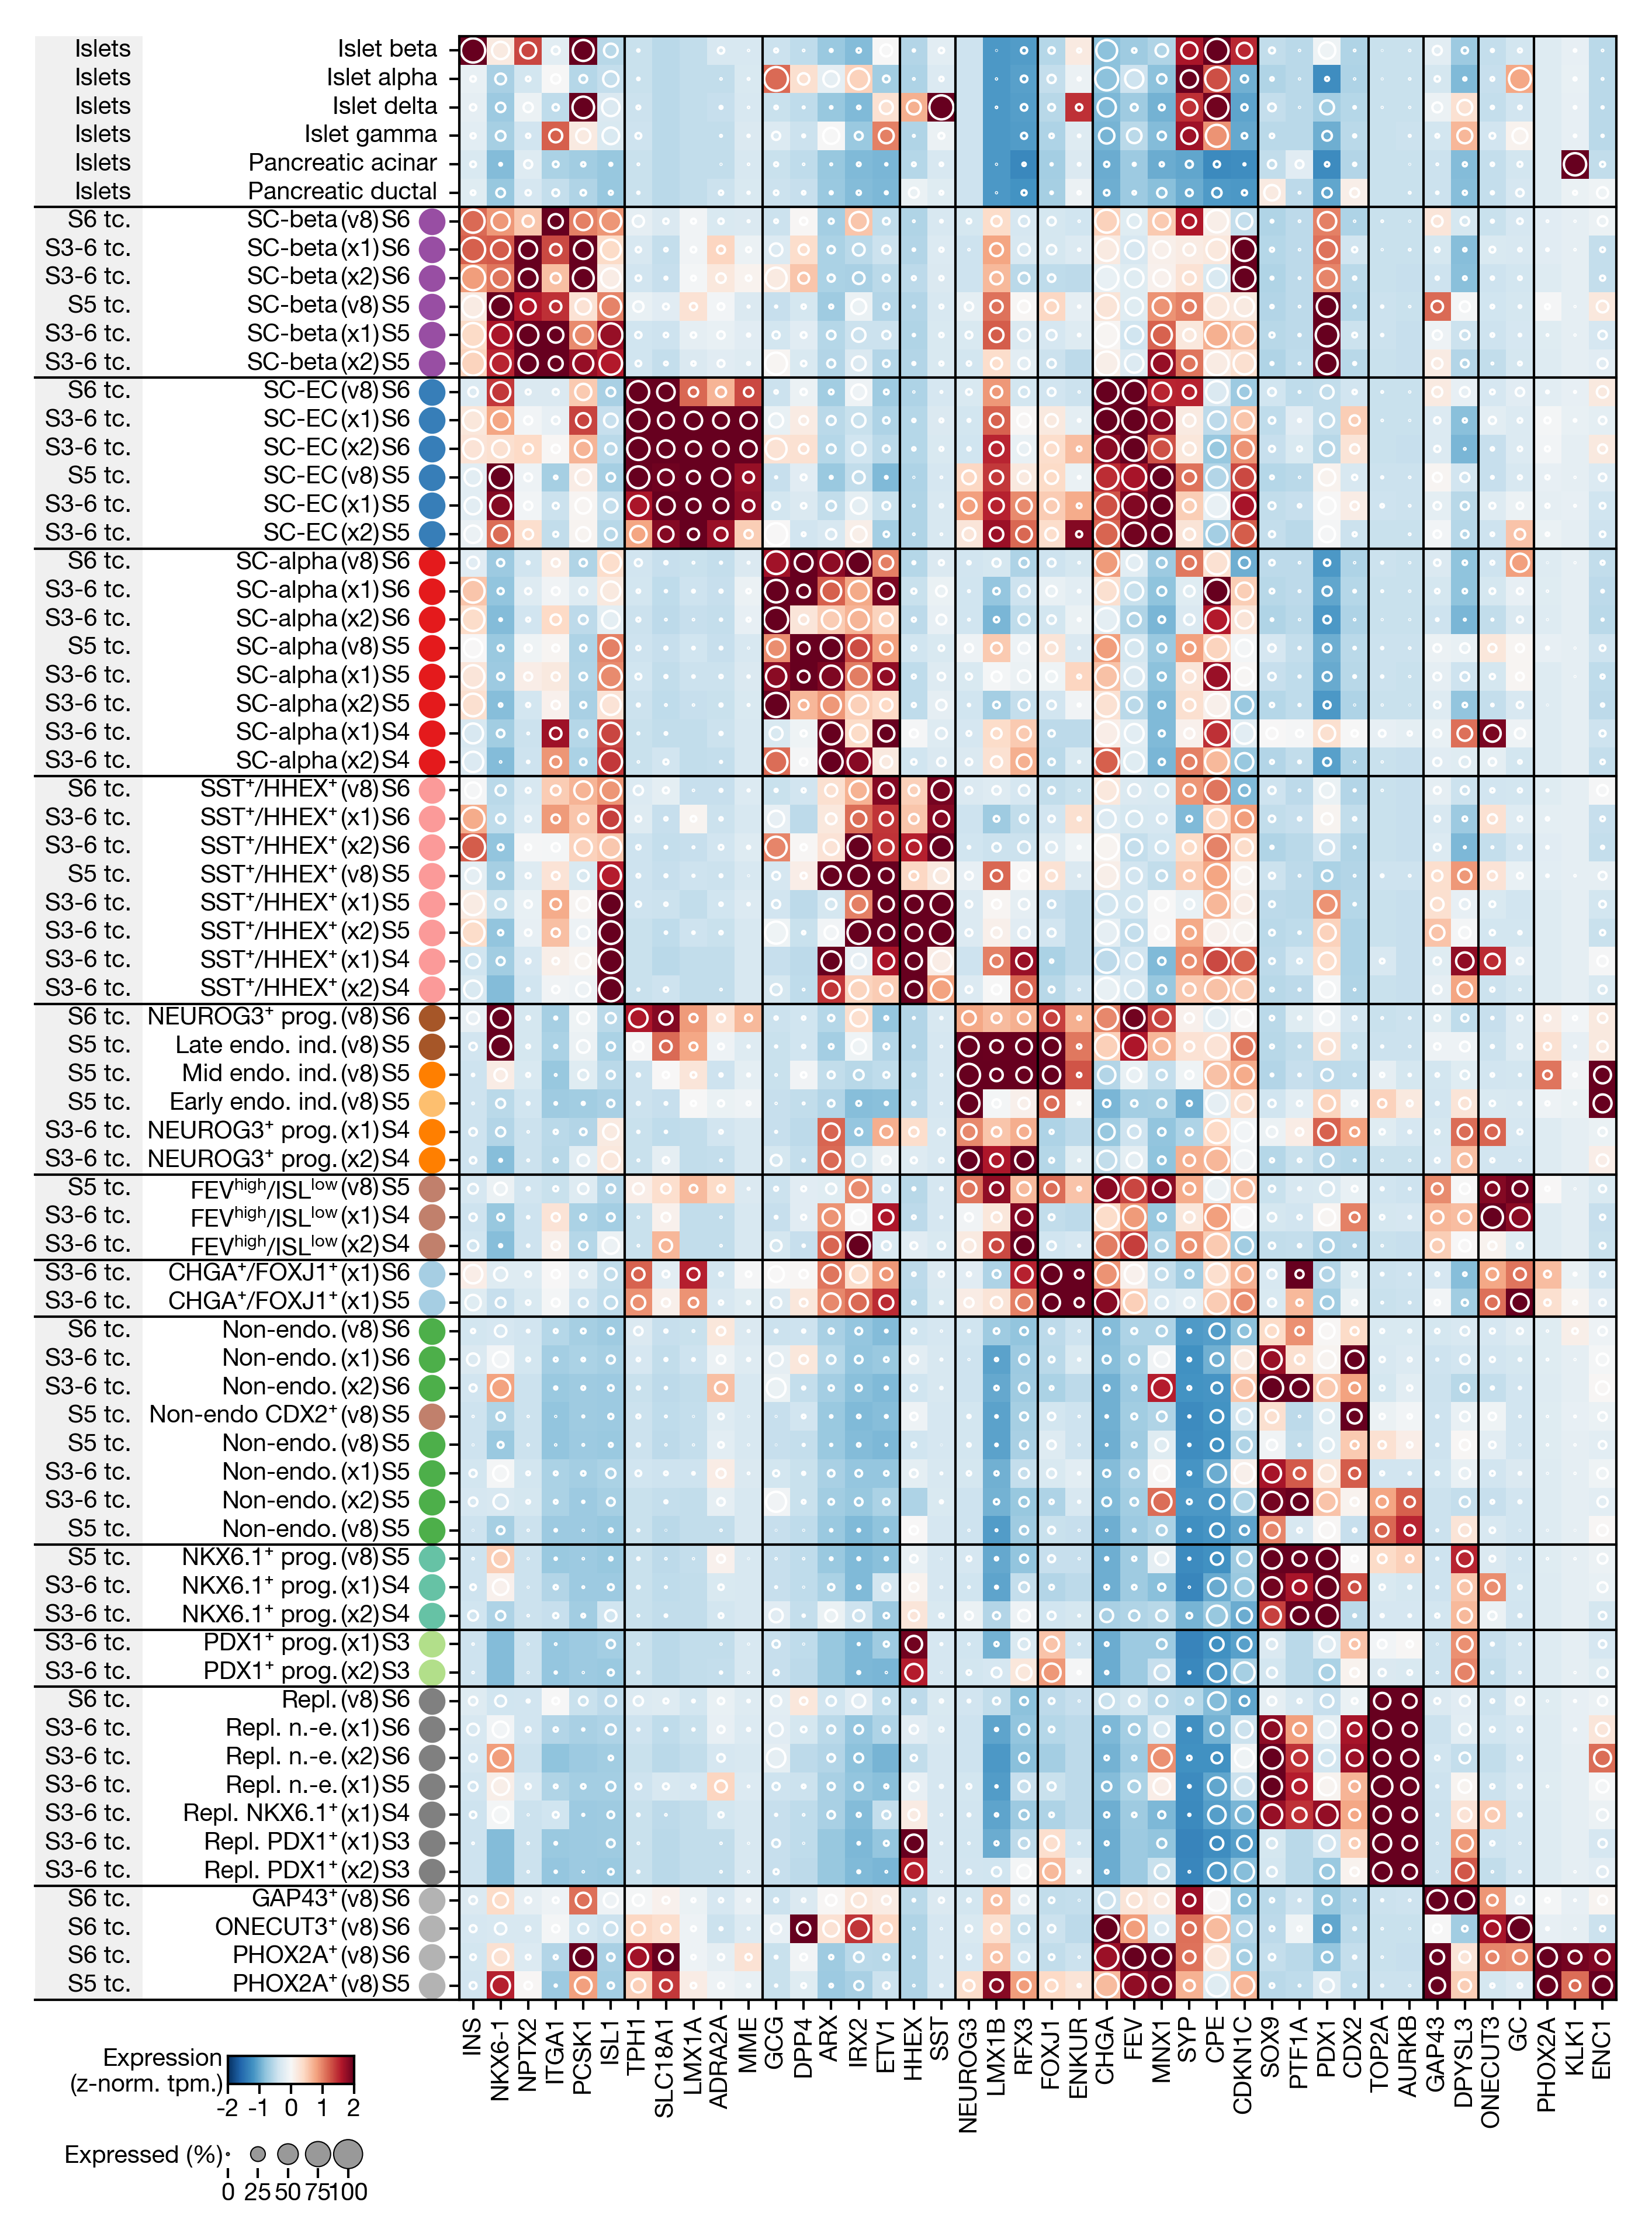

In [8]:
global_markers = [
    ['INS', 'NKX6-1', 'NPTX2', 'ITGA1', 'PCSK1', 'ISL1',],
    ['TPH1', 'SLC18A1', 'LMX1A', 'ADRA2A', 'MME'], 
    ['GCG', 'DPP4', 'ARX', 'IRX2', 'ETV1'],
    ['HHEX', "SST"],
    ['NEUROG3', 'LMX1B', 'RFX3'],
    ['FOXJ1', 'ENKUR'],
    ['CHGA', 'FEV', 'MNX1', 'SYP', 'CPE', 'CDKN1C', ],
    ['SOX9', 'PTF1A', 'PDX1', 'CDX2'],
    ['TOP2A', 'AURKB'],
#     ['CDX2', 'OSR1'],
    ['GAP43', 'DPYSL3'],
    ['ONECUT3', 'GC'],
    ['PHOX2A', 'KLK1', 'ENC1'],
    
]

g_grp = global_markers


importlib.reload(fv)
norm_tpm = cluster_tpm.copy()# + 1

norm_tpm -= norm_tpm.mean(0)
norm_tpm /= norm_tpm.std(0)
vmin, vmax = (-2, 2)
cmap = 'RdBu_r'

# norm_tpm /= norm_tpm.max(0)
# norm_tpm = np.log10(norm_tpm + 0.01)
# # norm_tpm = norm_tpm.T
# # vmin, vmax = (-0.6, 1)
# vmin, vmax = (-3, 0)


_tpm = norm_tpm[sum(g_grp)].values
_frac = cluster_expr[sum(g_grp)].values

_y, _x = np.mgrid[:_tpm.shape[0], :_tpm.shape[1]]
_x = _x.ravel()
_y = _y.ravel()


###### Main plot
# 
#

fig = plt.figure(figsize=(6,8), dpi=600)

ax = fig.add_axes([0.27, 0.26, 0.55, 0.7],
              xscale='linear', yscale='linear',
            xlabel='', ylabel='', frameon=True)
ax.set_axisbelow(True)

# Draw fancy y tick labels
ax.set_yticks(range(len(cluster_order)))
ax.set_yticklabels([])
# ax.set_yticklabels([f"[{l}]{c}" for l,c in cluster_order])


# Draw data points
ax.imshow(_tpm, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto')
imax = ax.scatter(_x, _y, s=_frac.ravel()*25, c='none',
#            linewidth=0.25,  edgecolor=core_colors.grey,
            linewidth=0.5, edgecolor='w',
          )

# Fix plot limits
ax.set_xticks(range(len(sum(g_grp))))
ax.set_xticklabels(sum(g_grp), rotation=90, fontsize=5);
ax.set_xlim([-0.50, len(sum(g_grp))-0.5])
ax.set_ylim([-0.50, len(cluster_order)-0.5])


prev_grp = ''
for li,((samp, cl), metagrp) in enumerate(cluster_order_details):
    sp = samp.split('.')[0]
    
    vpos = li
    label_params = fv.dataset_label_params(sp)
    
#     if cl in label_params: 
    ypos = -0.5
    if sp != 'human_islets':
        ypos += -1.0
        ax.scatter(ypos, vpos, s=20, clip_on=False,
                   c=label_params[cl]['color_vec'])
    
        ypos += -1.3
        ax.text(ypos, vpos, f'S{dataset_stage[sp]}', ha='center', va='center',
                    clip_on=False, fontsize=5)   
    
        ypos += -1.3
        ax.text(ypos, vpos, f'({dataset_protocol[sp]})', ha='center', va='center',
                    clip_on=False, fontsize=5)   
    
    ypos += -0.8
    curr_label = label_params[cl]['short_label']
    vpos_adj = -0.1 if '^' in curr_label else 0
    ax.text(ypos, vpos + vpos_adj, curr_label, ha='right', va='center',
                clip_on=False, fontsize=5)

    if sp == 'human_islets':
        ypos += -3.6
    
    ypos += -7.5
    ax.text(ypos, vpos, dataset_labels[sp], ha='right', va='center',
                clip_on=False, fontsize=5)  
    
    if metagrp != prev_grp:
        ax.plot([ypos-3.5, len(sum(g_grp))-0.5], [vpos-0.5, vpos-0.5], color='k', lw=0.5, clip_on=False)
    prev_grp = metagrp
    
ax.add_patch(
    patches.Rectangle(
        (ypos-3.5, -0.5), 3.9, len(cluster_order), clip_on=False,
        facecolor='#f0f0f0', edgecolor='none', linewidth=0.5, zorder=-10
    ))

###### Boxes and vertical lines
# 
#
gc = 0
for g in g_grp:
    n_gs = len(g)
    ax.axvline(gc-0.5, -10,10, c='k', linewidth=0.5)
    gc += n_gs
    
    
###### Colorbar
# 
#

colorbar_ax_position = [0.16, 0.23, 0.06, 0.01]
colorbar_ax = fig.add_axes(colorbar_ax_position,
                xscale='linear', yscale='linear', yticks=[0.5], xticks=np.linspace(-2,2,5),
                xlabel='', ylabel='', frameon=True, )

gradient = np.linspace(vmin, vmax, 256)
gradient = np.vstack((gradient, gradient))
colorbar_ax.imshow(gradient, aspect='auto', extent=(vmin,vmax,0,1), 
            cmap=cmap, vmin=vmin, vmax=vmax)
colorbar_ax.tick_params(axis='y', length=0)
colorbar_ax.set_xticklabels([-2,-1,0,1,2], fontsize=5);

colorbar_ax.set_yticklabels(['Expression\n(z-norm. tpm.)'], fontsize=5);

###### Expression % legend
# 
#

size_ax_position = [0.16, 0.20, 0.06, 0.01]
size_ax = fig.add_axes(size_ax_position,
                xscale='linear', yscale='linear', yticks=[0], xticks=range(5),
                xlabel='', ylabel='', frameon=False, )

size_ax.scatter(range(5), np.zeros(5), s=(np.linspace(0,1,5)+0.01)*35, facecolor=core_colors.grey,
                edgecolor='k',linewidth=0.25, clip_on=False)
size_ax.set_xlim([0,4.2])
size_ax.tick_params(axis='y', length=0)
size_ax.set_xticklabels(['0', '25', '50', '75', '100'], fontsize=5);

size_ax.set_yticklabels(['Expressed (%)'], fontsize=5);

fig.savefig('../../figures/components/supp_figure1/SuppFigure1.pdf', dpi=600)


# plt.close()

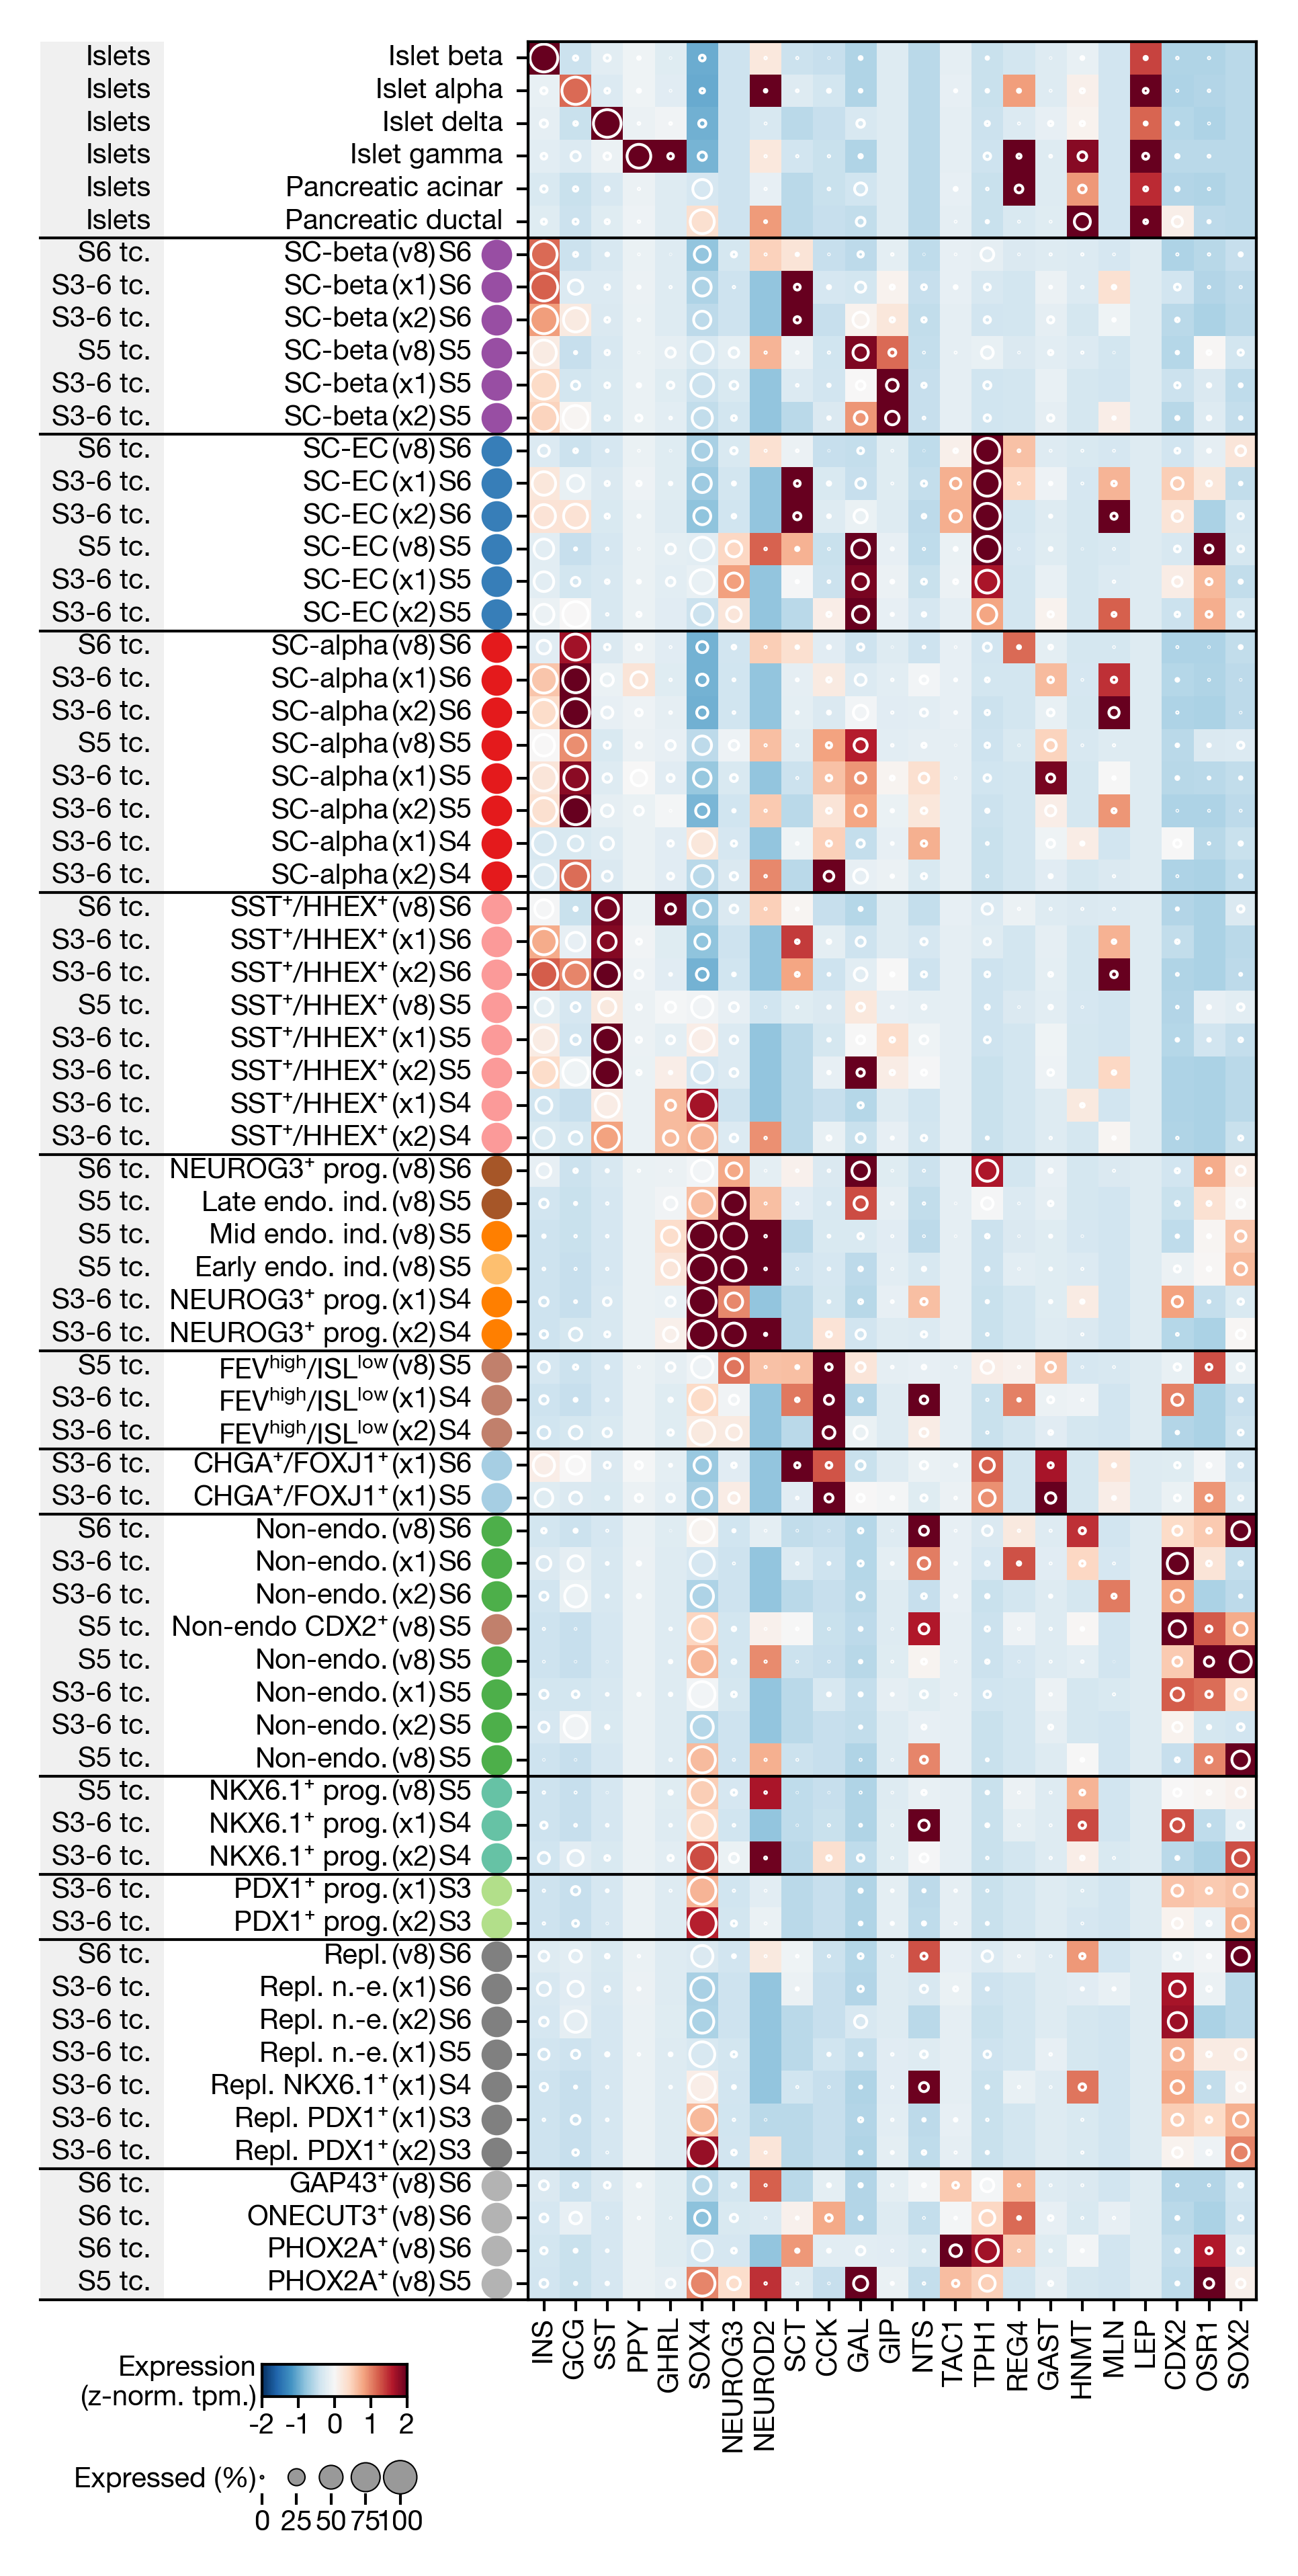

In [9]:


entero_markers = [
    ['INS', 'GCG', 'SST', 'PPY', 'GHRL', 'SOX4', 'NEUROG3', 'NEUROD2', 'SCT', 'CCK', 'GAL',
     'GIP', 'NTS', 'TAC1', 'TPH1', "REG4", 'GAST', 'HNMT', 'MLN', 'LEP', 'CDX2', 'OSR1', 'SOX2'],
    [],
    
]

g_grp = entero_markers


importlib.reload(fv)
norm_tpm = cluster_tpm.copy()# + 1

norm_tpm -= norm_tpm.mean(0)
norm_tpm /= norm_tpm.std(0)
vmin, vmax = (-2, 2)
cmap = 'RdBu_r'

# norm_tpm /= norm_tpm.max(0)
# norm_tpm = np.log10(norm_tpm + 0.01)
# # norm_tpm = norm_tpm.T
# # vmin, vmax = (-0.6, 1)
# vmin, vmax = (-3, 0)


_tpm = norm_tpm[sum(g_grp)].values
_frac = cluster_expr[sum(g_grp)].values

_y, _x = np.mgrid[:_tpm.shape[0], :_tpm.shape[1]]
_x = _x.ravel()
_y = _y.ravel()


###### Main plot
# 
#

fig = plt.figure(figsize=(6,8), dpi=600)

ax = fig.add_axes([0.27, 0.26, 0.55/len(sum(global_markers))*len(sum(entero_markers)), 0.7],
              xscale='linear', yscale='linear',
            xlabel='', ylabel='', frameon=True)
ax.set_axisbelow(True)

# Draw fancy y tick labels
ax.set_yticks(range(len(cluster_order)))
ax.set_yticklabels([])
# ax.set_yticklabels([f"[{l}]{c}" for l,c in cluster_order])


# Draw data points
ax.imshow(_tpm, cmap=cmap, vmin=vmin, vmax=vmax, aspect='auto')
imax = ax.scatter(_x, _y, s=_frac.ravel()*25, c='none',
#            linewidth=0.25,  edgecolor=core_colors.grey,
            linewidth=0.5, edgecolor='w',
          )

# Fix plot limits
ax.set_xticks(range(len(sum(g_grp))))
ax.set_xticklabels(sum(g_grp), rotation=90, fontsize=5);
ax.set_xlim([-0.50, len(sum(g_grp))-0.5])
ax.set_ylim([-0.50, len(cluster_order)-0.5])


prev_grp = ''
for li,((samp, cl), metagrp) in enumerate(cluster_order_details):
    sp = samp.split('.')[0]
    
    vpos = li
    label_params = fv.dataset_label_params(sp)
    
#     if cl in label_params: 
    ypos = -0.5
    if sp != 'human_islets':
        ypos += -1.0
        ax.scatter(ypos, vpos, s=20, clip_on=False,
                   c=label_params[cl]['color_vec'])
    
        ypos += -1.3
        ax.text(ypos, vpos, f'S{dataset_stage[sp]}', ha='center', va='center',
                    clip_on=False, fontsize=5)   
    
        ypos += -1.3
        ax.text(ypos, vpos, f'({dataset_protocol[sp]})', ha='center', va='center',
                    clip_on=False, fontsize=5)   
    
    ypos += -0.8
    curr_label = label_params[cl]['short_label']
    vpos_adj = -0.1 if '^' in curr_label else 0
    ax.text(ypos, vpos + vpos_adj, curr_label, ha='right', va='center',
                clip_on=False, fontsize=5)

    if sp == 'human_islets':
        ypos += -3.6
    
    ypos += -7.5
    ax.text(ypos, vpos, dataset_labels[sp], ha='right', va='center',
                clip_on=False, fontsize=5)  
    
    if metagrp != prev_grp:
        ax.plot([ypos-3.5, len(sum(g_grp))-0.5], [vpos-0.5, vpos-0.5], color='k', lw=0.5, clip_on=False)
    prev_grp = metagrp
    
ax.add_patch(
    patches.Rectangle(
        (ypos-3.5, -0.5), 3.9, len(cluster_order), clip_on=False,
        facecolor='#f0f0f0', edgecolor='none', linewidth=0.5, zorder=-10
    ))

###### Boxes and vertical lines
# 
#
gc = 0
for g in g_grp:
    n_gs = len(g)
    ax.axvline(gc-0.5, c='k', linewidth=0.5)
    gc += n_gs
    
    
###### Colorbar
# 
#

colorbar_ax_position = [0.16, 0.23, 0.06, 0.01]
colorbar_ax = fig.add_axes(colorbar_ax_position,
                xscale='linear', yscale='linear', yticks=[0.5], xticks=np.linspace(-2,2,5),
                xlabel='', ylabel='', frameon=True, )

gradient = np.linspace(vmin, vmax, 256)
gradient = np.vstack((gradient, gradient))
colorbar_ax.imshow(gradient, aspect='auto', extent=(vmin,vmax,0,1), 
            cmap=cmap, vmin=vmin, vmax=vmax)
colorbar_ax.tick_params(axis='y', length=0)
colorbar_ax.set_xticklabels([-2,-1,0,1,2], fontsize=5);

colorbar_ax.set_yticklabels(['Expression\n(z-norm. tpm.)'], fontsize=5);

###### Expression % legend
# 
#

size_ax_position = [0.16, 0.20, 0.06, 0.01]
size_ax = fig.add_axes(size_ax_position,
                xscale='linear', yscale='linear', yticks=[0], xticks=range(5),
                xlabel='', ylabel='', frameon=False, )

size_ax.scatter(range(5), np.zeros(5), s=(np.linspace(0,1,5)+0.01)*35, facecolor=core_colors.grey,
                edgecolor='k',linewidth=0.25, clip_on=False)
size_ax.set_xlim([0,4.2])
size_ax.tick_params(axis='y', length=0)
size_ax.set_xticklabels(['0', '25', '50', '75', '100'], fontsize=5);

size_ax.set_yticklabels(['Expressed (%)'], fontsize=5);

fig.savefig('../../figures/components/supp_figure2/SuppFigure2.pdf', dpi=600)


# plt.close()